---
# Data Analysis
---
In this notebook, it is the data analysis section.

Since the goal is to create clusters that would group food that has a similar Environmental Footprint together. We will be investigating the relationship of the various columns with the EF Score and see if there are some trends that are worth mentioning.

1. We will be looking at the data distribution of the Environmental Footprint (EF) Score.
   - EF Score has a right skewed distribution
   - Most Food have an eF Score between 0 and 2
2. We will be looking at the distribution of the EF Score for each food group.
   - The food group 'Meat, Eggs, Fish' contains the food with the highest EF Score
3. We will be looking at the distribution of the EF Score for each food sub-group.
   - The food sub-group 'Meat', 'Fish' and 'Shellfish' contains the food with the highest EF Score.
   - Of the group 'Meat, Eggs, Fish', Eggs and Meat Substitute have a very low EF SCore.
4. We will be looking at the Season column.
   - Not much information can be retrieved here, since the 'Mixed' column overlaps both In Season and Out of Season food.
5. We will be looking at the column 'Airplane Code'.
   - There are other means of transportation that would have a higher EF score than by plane.
   - Not the most valuable columns, since missing details about transportation type.
6. We will be looking into the EF Score by Delivery.
   - The Glacé ('Iced') has the highest EF Score.
   - It is important to note that and Iced delivery has an significant higher EF Score than a Frozen delivery.
7. We will be looking at the packaging method and its relation with the EF Score.
   - There no sigificant trend. There must be missing details about packaging material in this column.
8. We will be looking at the 'Preparation' column vs the EF score.
   - Using the 'Stove' to preapare a meal leads to higher EF Score
   - Using the 'Oven' to prepare a meal is close second to high EF Score. 
9. Finally, we are looking at the dispersion of EF score by Food Group for
   - 'Ozone Layer Depletion', 'Ionizing Radiation',
   -    'Photochemical Ozone Formation', 'Fine Particles',
   -    'Toxicological Effects (Non-carcinogenic)',
   -    'Toxicological Effects (Carcinogenic)',
   -    'Terrestrial and Freshwater Acidification', 'Freshwater Eutrophication',
   -    'Marine Eutrophication', 'Terrestrial Eutrophication',
   -    'Ecotoxicity for Freshwater Aquatic Ecosystems', 'Land Use',
   -    'Water Resource Depletion', 'Energy Resource Depletion',
   -    'Mineral Resource Depletion', 'Climate Change - Biogenic Emissions',
   -    'Climate Change - Fossil Emissions',
   -    'Climate Change - Emissions from Land Use Change'


---

### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt


### Read data file

In [2]:
df = pd.read_excel('../data/AGRIBALYSE3.2_Synthese_cleaned.xlsx')
df

,Food Group,Food Sub-group,LCI Name,Season Code,Airplane Code,Delivery,Packaging,Preparation,EF Score,Ozone Layer Depletion,...,Marine Eutrophication,Terrestrial Eutrophication,Ecotoxicity for Freshwater Aquatic Ecosystems,Land Use,Water Resource Depletion,Energy Resource Depletion,Mineral Resource Depletion,Climate Change - Biogenic Emissions,Climate Change - Fossil Emissions,Climate Change - Emissions from Land Use Change
0,aides culinaires et ingrédients divers,aides culinaires,"Aromatic stock cube, for fish, dehydrated",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.874152,2.932471e-07,...,0.026783,0.137099,70.183757,106.309500,3.380742,700.159580,0.000051,0.103694,7.459628,0.021197
1,aides culinaires et ingrédients divers,aides culinaires,Topping sauce for pizza,2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.148315,2.703735e-08,...,0.004162,0.030263,11.027442,67.673943,2.468103,24.405351,0.000006,0.033626,1.015114,-0.108325
2,aides culinaires et ingrédients divers,aides culinaires,"Soy ""cream"" preparation",2,0,Ambiant (long),PACK PROXY,Pas de préparation,0.147701,3.382798e-08,...,0.007233,0.024434,30.835753,116.492280,0.422468,22.429809,0.000004,0.025180,0.964544,0.184348
3,aides culinaires et ingrédients divers,algues,"Seaweed, agar, raw",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,6.270593e-07,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
4,aides culinaires et ingrédients divers,algues,"Sea lettuce (Enteromorpha sp.), dried or dehyd...",2,0,Ambiant (long),PACK PROXY,Pas de préparation,1.547348,6.270593e-07,...,0.015034,0.143648,57.867520,26.718351,4.833158,395.946390,0.000079,0.040063,11.740311,0.006545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2446,"viandes, œufs, poissons",viandes cuites,"Veal, knuckle or shank, braised or boiled",2,0,Glacé,PACK AGB,Cuisson à l'eau,2.744841,3.465597e-07,...,0.091173,1.457487,391.691640,1336.417000,4.021206,149.244380,0.000057,15.861507,11.205989,2.617929
2447,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, grilled/pan-fried",2,0,Glacé,PACK AGB,Poêle,2.719832,3.360531e-07,...,0.091187,1.457302,392.319170,1339.161800,3.972692,141.891310,0.000056,15.821821,10.946006,2.621672
2448,"viandes, œufs, poissons",viandes cuites,"Veal, tenderloin, roasted",2,0,Glacé,PACK AGB,Four,2.738488,3.342279e-07,...,0.091077,1.457291,392.244620,1336.137200,3.991295,149.677240,0.000059,15.821740,10.910768,2.617884
2449,"viandes, œufs, poissons",viandes cuites,"Veal, roast, cooked",2,0,Glacé,PACK AGB,Four,3.418940,4.171038e-07,...,0.113935,1.821645,490.596670,1670.079500,4.984198,184.179660,0.000072,19.864699,13.630845,3.272343


### Investigate distribution of 'EF Score' 

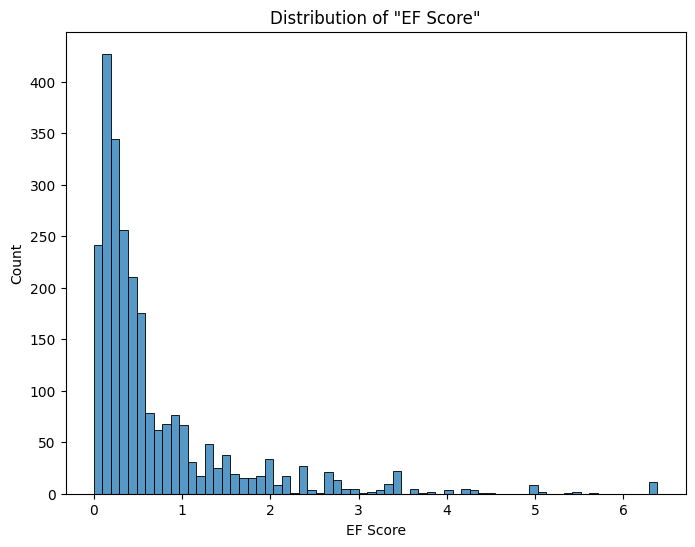

In [29]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.histplot(df, x='EF Score', legend=False)

# Add title
ax.set_title('Distribution of "EF Score"')

# Add axis labels
ax.set_xlabel('EF Score')
ax.set_ylabel('Count')

# Save plot
plt.savefig('../graph/Histogram.png')

# Show plot
plt.show()

### Looking at the Food Group vs EF Score

In [4]:
df['Food Group'].unique()

array(['aides culinaires et ingrédients divers', 'aliments infantiles',
       'boissons', 'entrées et plats composés',
       'fruits, légumes, légumineuses et oléagineux', 'glaces et sorbets',
       'lait et produits laitiers', 'matières grasses',
       'produits céréaliers', 'produits sucrés',
       'viandes, œufs, poissons'], dtype=object)

/tmp/ipykernel_1831351/2143200398.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Food Group'].unique(),rotation=90)


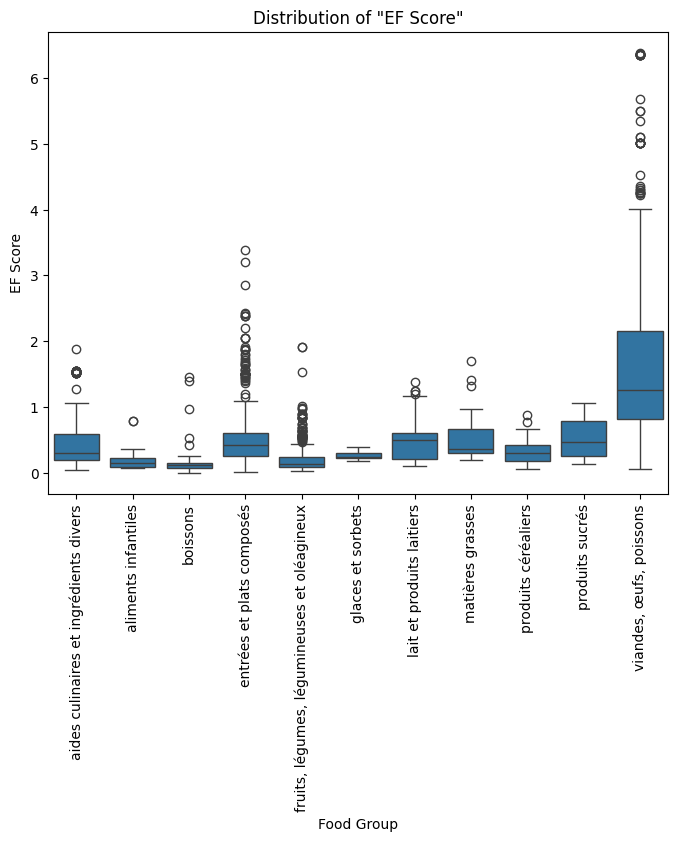

In [30]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.boxplot(df, x='Food Group', y='EF Score', legend=False)

# Add titlev
ax.set_title('Distribution of "EF Score"')

# Add axis labels
ax.set_xlabel('Food Group')
ax.set_ylabel('EF Score')

ax.set_xticklabels(df['Food Group'].unique(),rotation=90)

# Save plot
plt.savefig('../graph/FoodGroup_vs_EF.png')

# Show plot
plt.show()

In [6]:
df['Food Sub-group'].unique()

array(['aides culinaires', 'algues', 'condiments',
       'denrées destinées à une alimentation particulière', 'épices',
       'herbes', 'ingrédients divers', 'sauces', 'sels',
       'céréales et biscuits infantiles', 'desserts infantiles',
       'laits et boissons infantiles',
       'petits pots salés et plats infantiles', 'boisson alcoolisées',
       'boissons sans alcool', 'eaux', 'feuilletées et autres entrées',
       'pizzas, tartes et crêpes salées', 'plats composés',
       'plats végétariens', 'salades composées et crudités', 'sandwichs',
       'soupes', 'fruits', 'fruits à coque et graines oléagineuses',
       'légumes', 'légumineuses', 'pommes de terre et autres tubercules',
       'desserts glacés', 'glaces', 'sorbets',
       'crèmes et spécialités à base de crème', 'fromages', 'laits',
       'produits laitiers frais et assimilés', 'autres matières grasses',
       'beurres', 'huiles de poissons', 'huiles et graisses végétales',
       'margarines', 'céréales de pe

/tmp/ipykernel_1831351/622714714.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Food Sub-group'].unique(),rotation=90)


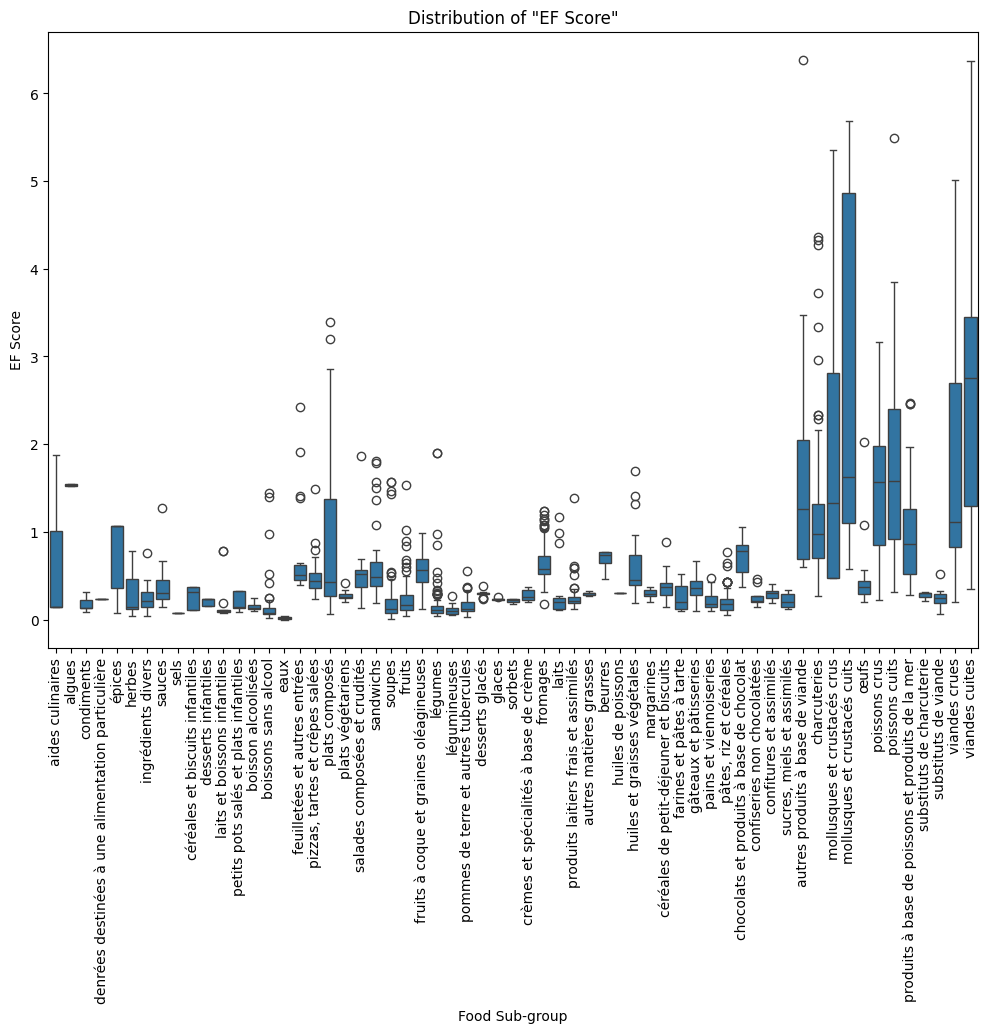

In [33]:
# Create figure and adjust size
plt.figure(figsize=(12,8))

# Create count plot
ax = sns.boxplot(df, x='Food Sub-group', y='EF Score', legend=False)

# Add titlev
ax.set_title('Distribution of "EF Score"')

# Add axis labels
ax.set_xlabel('Food Sub-group')
ax.set_ylabel('EF Score')

ax.set_xticklabels(df['Food Sub-group'].unique(),rotation=90)

# Show plot
plt.show()

In [8]:
df['Season Code'].unique()

array([2, 1, 0])

/tmp/ipykernel_1831351/1629485258.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Out of season','In season', 'Mixed consumption'])


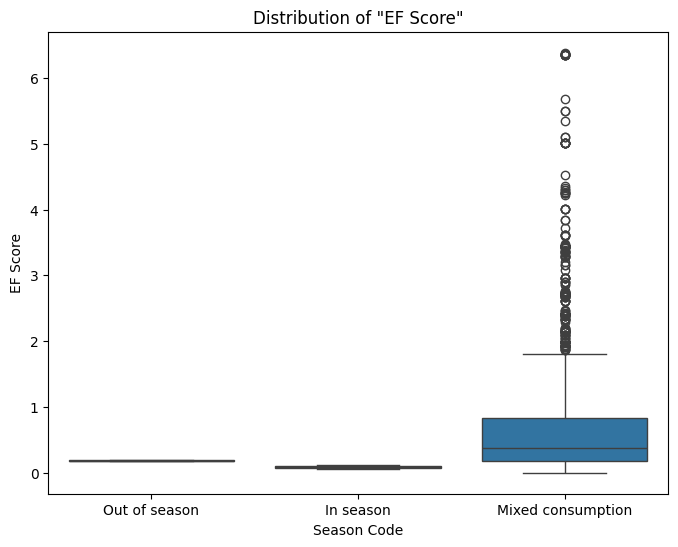

In [9]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.boxplot(df, x='Season Code', y='EF Score', legend=False)

# Add titlev
ax.set_title('Distribution of "EF Score"')

# Add axis labels
ax.set_xlabel('Season Code')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(['Out of season','In season', 'Mixed consumption'])

# Show plot
plt.show()

In [10]:
df['Airplane Code'].unique()

array([0, 1])

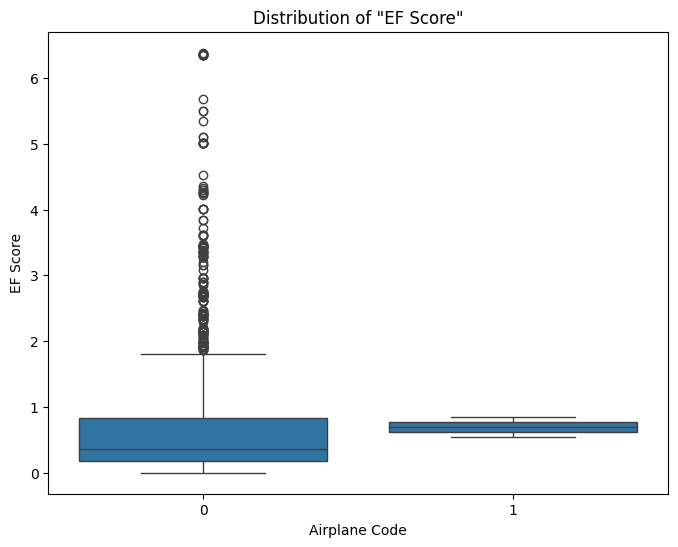

In [11]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.boxplot(df, x='Airplane Code', y='EF Score', legend=False)

# Add titlev
ax.set_title('Distribution of "EF Score"')

# Add axis labels
ax.set_xlabel('Airplane Code')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(['Out of season','In season', 'Mixed consumption'])

# Show plot
plt.show()

In [12]:
df['Delivery'].unique()

array(['Ambiant (long)', 'Glacé', 'Congelé', 'Ambiant (moyen)',
       'Ambiant (court)'], dtype=object)

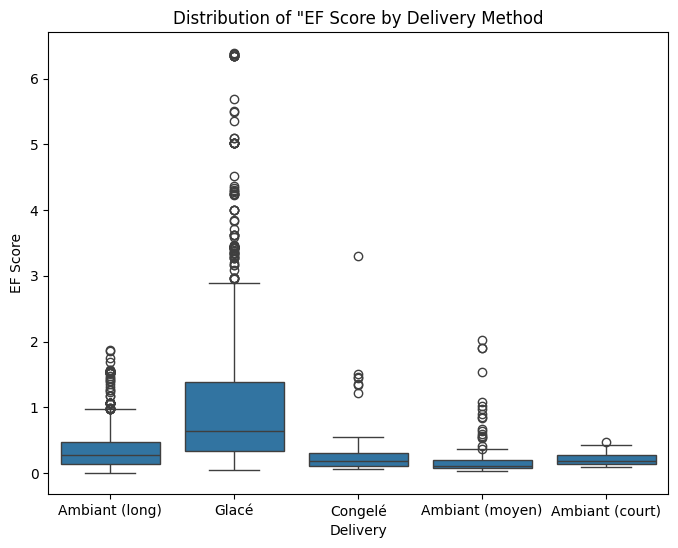

In [34]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.boxplot(df, x='Delivery', y='EF Score', legend=False)

# Add titlev
ax.set_title('Distribution of "EF Score by Delivery Method')

# Add axis labels
ax.set_xlabel('Delivery')
ax.set_ylabel('EF Score')

# Save plot
plt.savefig('../graph/Delivery.png')

# Show plot
plt.show()

In [14]:
df['Packaging'].unique()

array(['PACK PROXY', 'PACK AGB'], dtype=object)

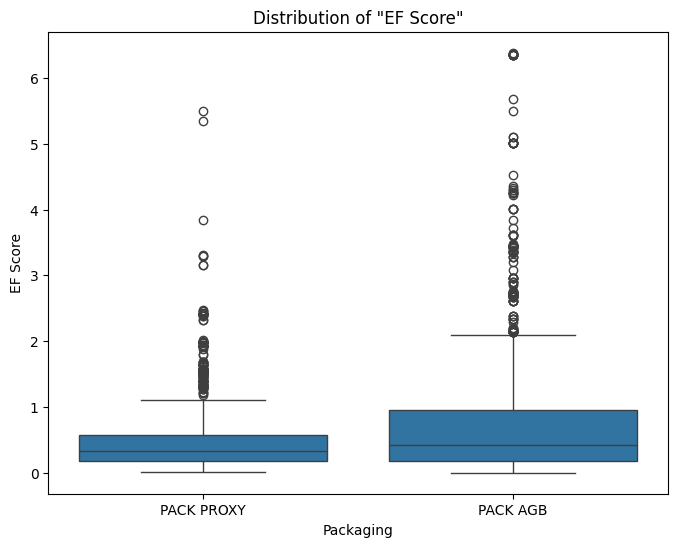

In [15]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.boxplot(df, x='Packaging', y='EF Score', legend=False)

# Add titlev
ax.set_title('Distribution of "EF Score"')

# Add axis labels
ax.set_xlabel('Packaging')
ax.set_ylabel('EF Score')

#
#ax.set_xticklabels(['Out of season','In season', 'Mixed consumption'])

# Show plot
plt.show()

In [16]:
df['Preparation'].unique()

array(['Pas de préparation', 'Micro-onde',
       'Réfrigéré chez le consommateur', "Cuisson à l'eau", 'Four',
       'Poêle'], dtype=object)

/tmp/ipykernel_1831351/789093948.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(df['Preparation'].unique(),rotation=90)


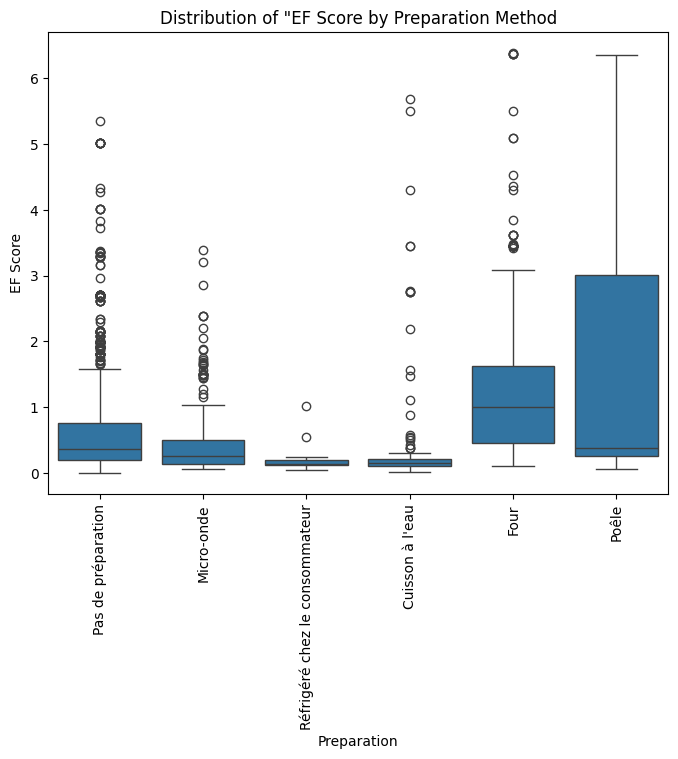

In [35]:
# Create figure and adjust size
plt.figure(figsize=(8,6))

# Create count plot
ax = sns.boxplot(df, x='Preparation', y='EF Score', legend=False)

# Add titlev
ax.set_title('Distribution of "EF Score by Preparation Method')

# Add axis labels
ax.set_xlabel('Preparation')
ax.set_ylabel('EF Score')

#
ax.set_xticklabels(df['Preparation'].unique(),rotation=90)

# Show plot
plt.show()

In [18]:
df.columns

Index(['Food Group', 'Food Sub-group', 'LCI Name', 'Season Code',
       'Airplane Code', 'Delivery', 'Packaging', 'Preparation', 'EF Score',
       'Ozone Layer Depletion', 'Ionizing Radiation',
       'Photochemical Ozone Formation', 'Fine Particles',
       'Toxicological Effects (Non-carcinogenic)',
       'Toxicological Effects (Carcinogenic)',
       'Terrestrial and Freshwater Acidification', 'Freshwater Eutrophication',
       'Marine Eutrophication', 'Terrestrial Eutrophication',
       'Ecotoxicity for Freshwater Aquatic Ecosystems', 'Land Use',
       'Water Resource Depletion', 'Energy Resource Depletion',
       'Mineral Resource Depletion', 'Climate Change - Biogenic Emissions',
       'Climate Change - Fossil Emissions',
       'Climate Change - Emissions from Land Use Change'],
      dtype='object')

In [21]:
cols = ['Ozone Layer Depletion', 'Ionizing Radiation',
       'Photochemical Ozone Formation', 'Fine Particles',
       'Toxicological Effects (Non-carcinogenic)',
       'Toxicological Effects (Carcinogenic)',
       'Terrestrial and Freshwater Acidification', 'Freshwater Eutrophication',
       'Marine Eutrophication', 'Terrestrial Eutrophication',
       'Ecotoxicity for Freshwater Aquatic Ecosystems', 'Land Use',
       'Water Resource Depletion', 'Energy Resource Depletion',
       'Mineral Resource Depletion', 'Climate Change - Biogenic Emissions',
       'Climate Change - Fossil Emissions',
       'Climate Change - Emissions from Land Use Change']

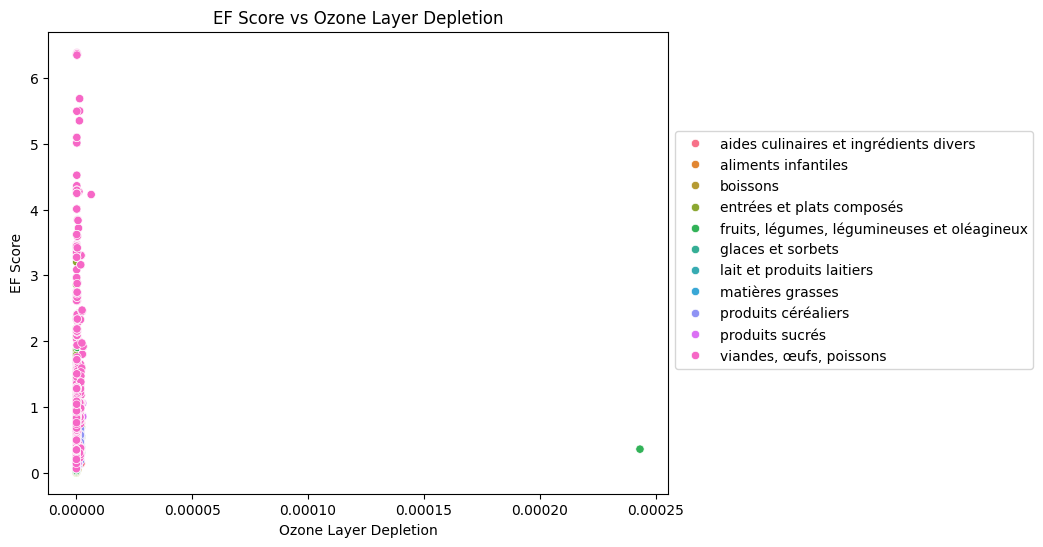

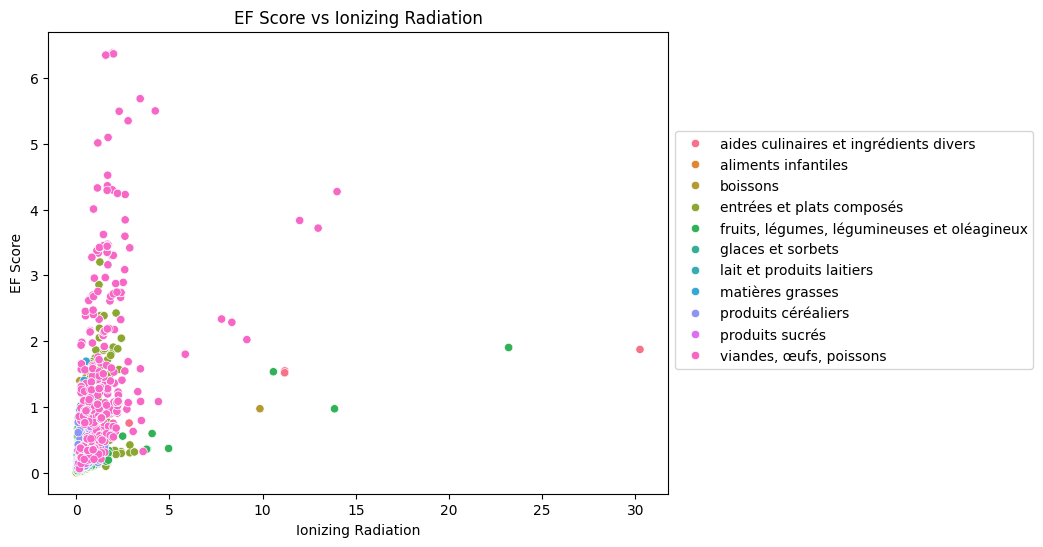

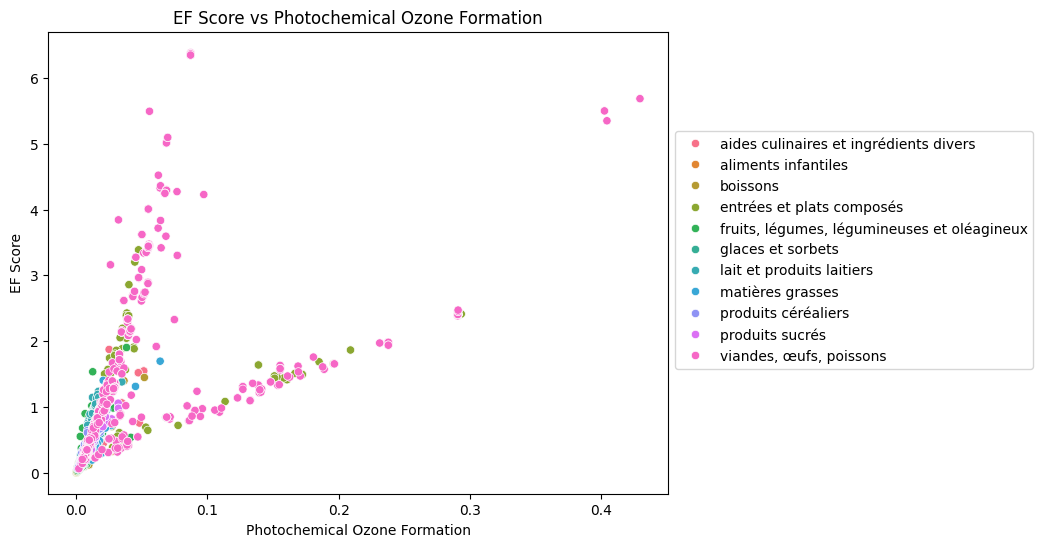

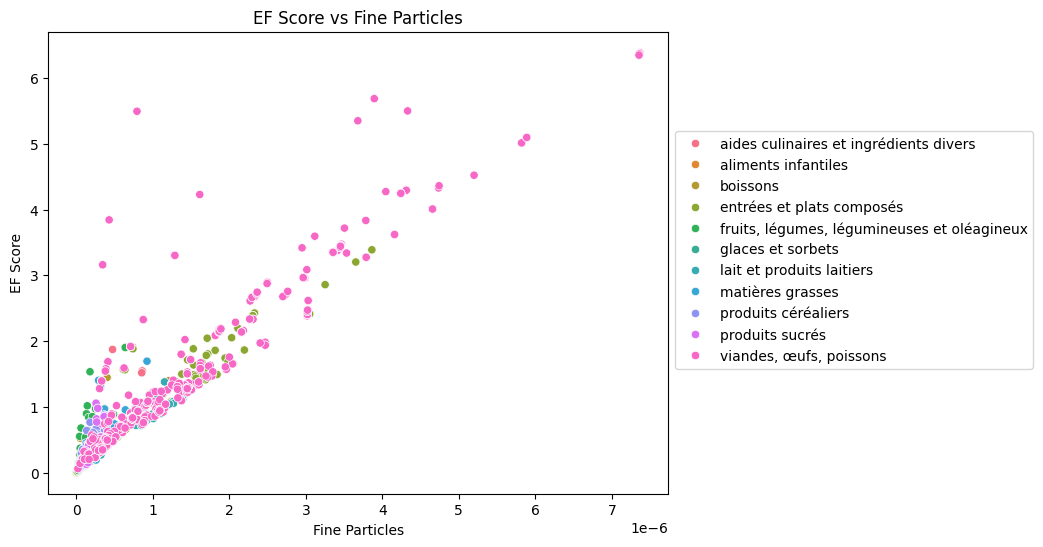

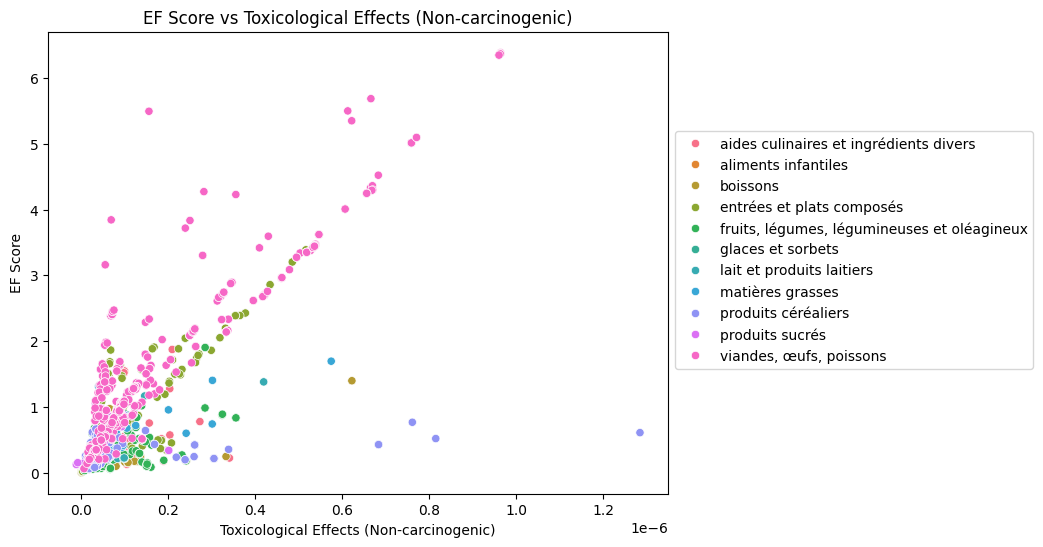

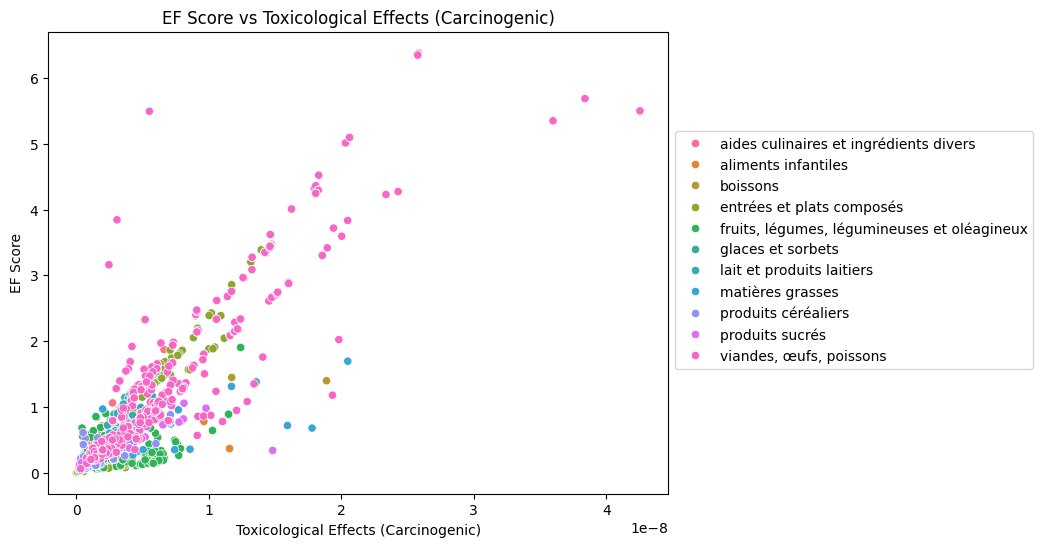

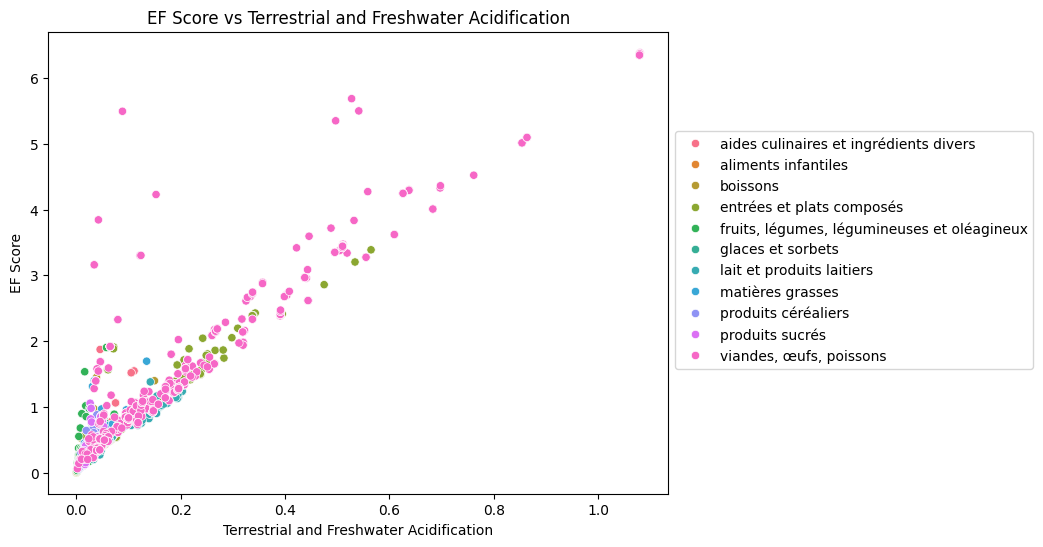

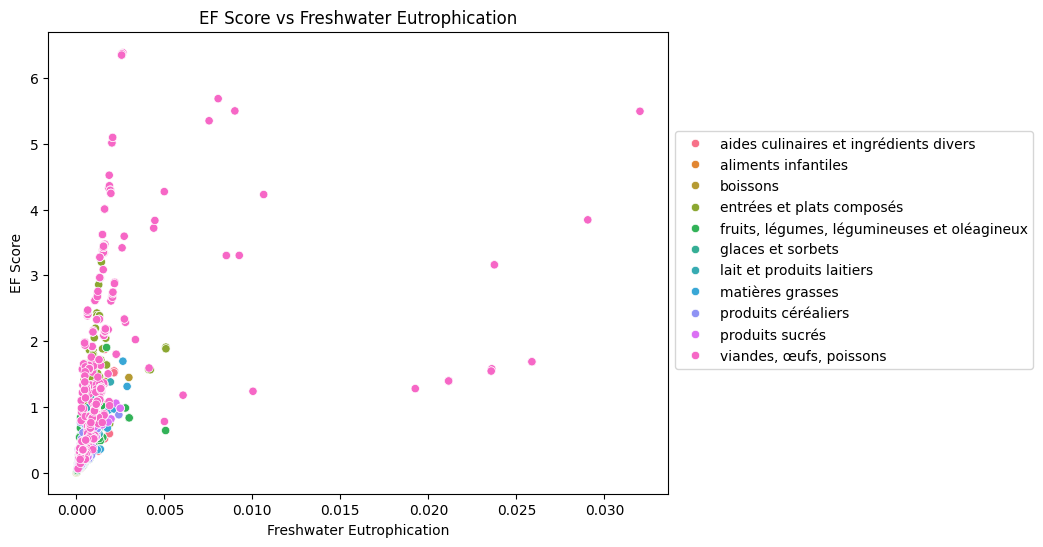

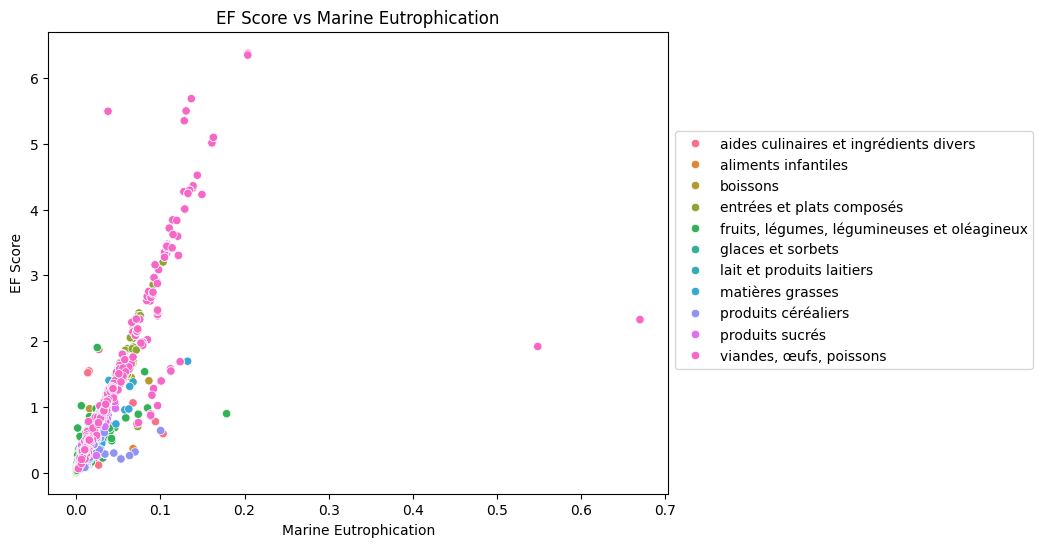

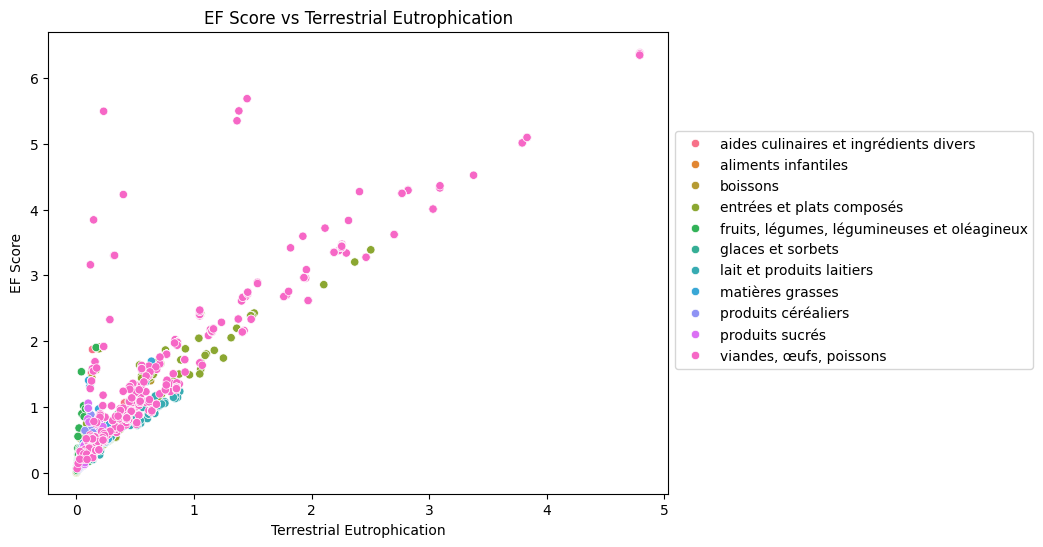

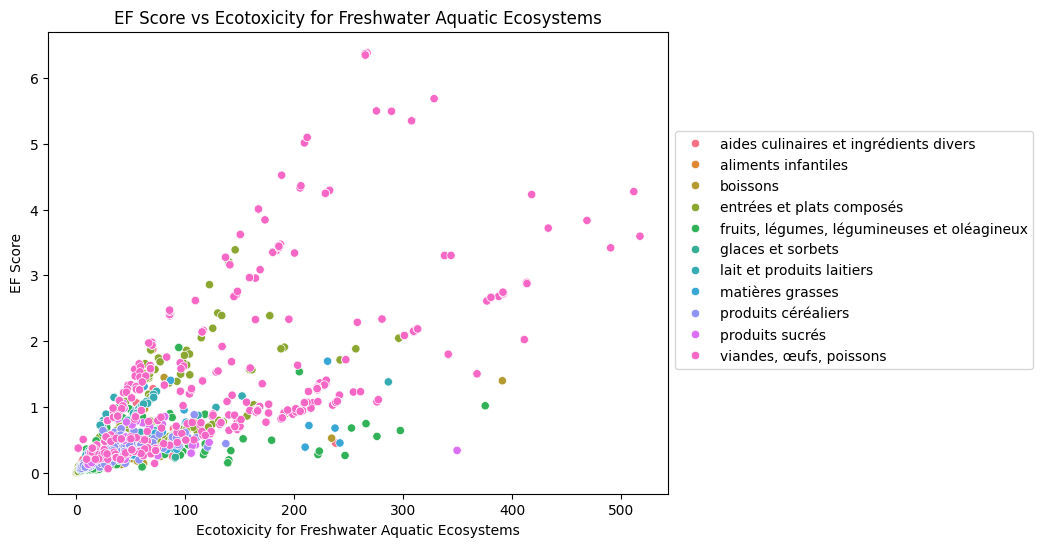

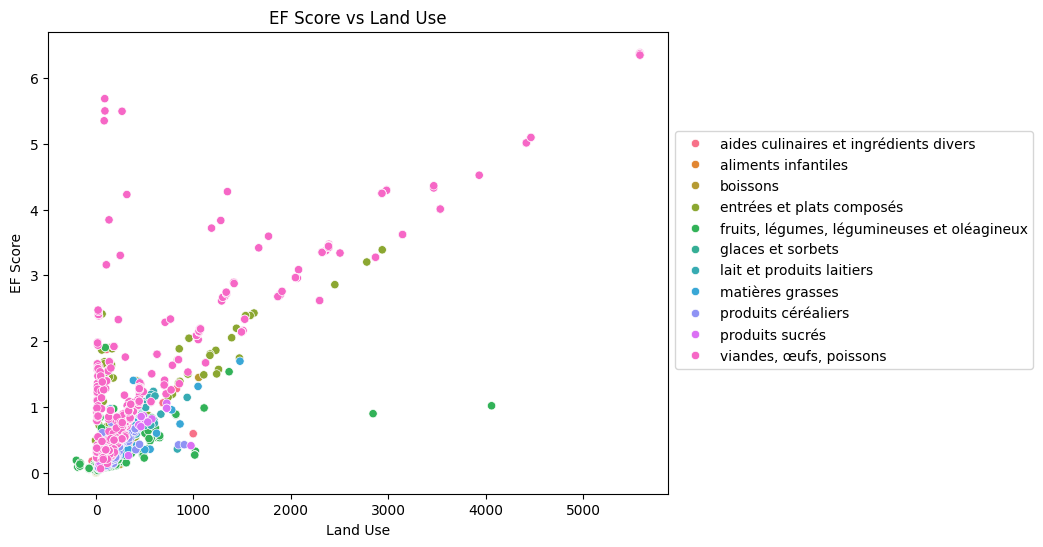

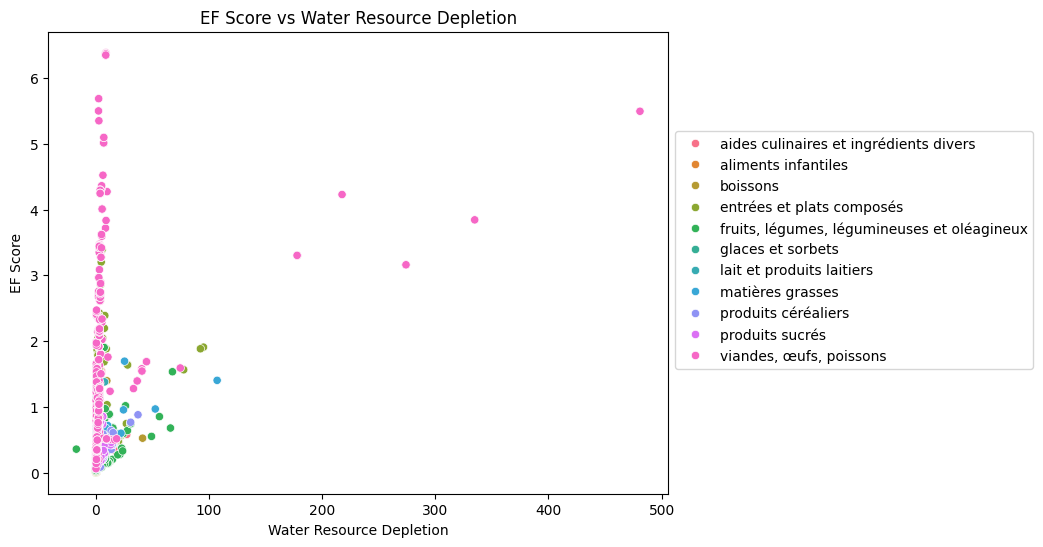

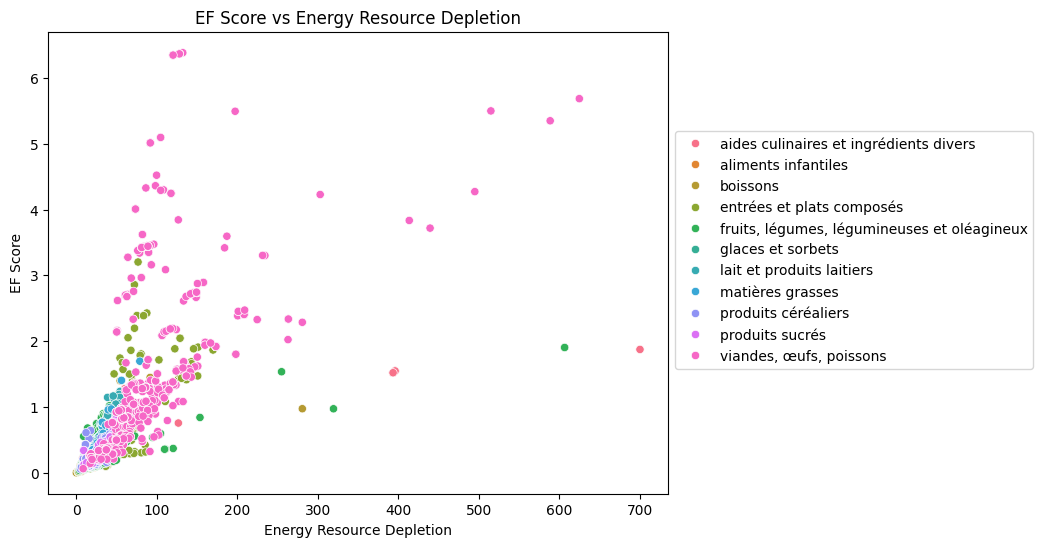

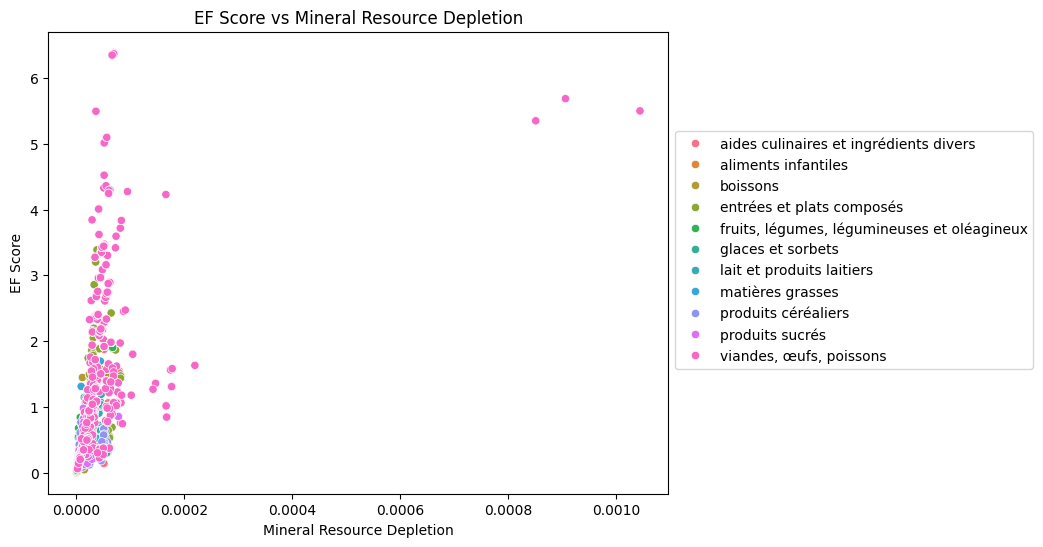

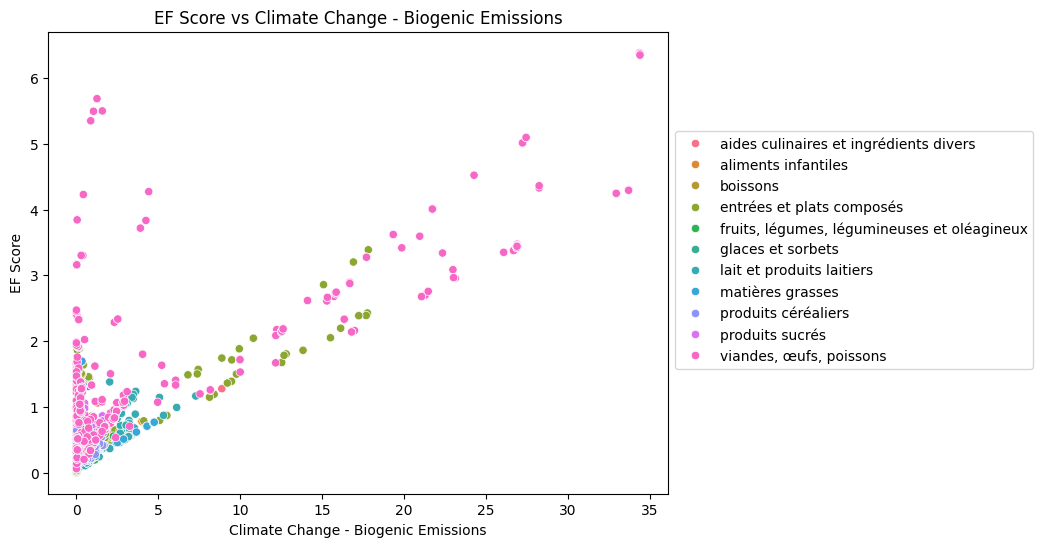

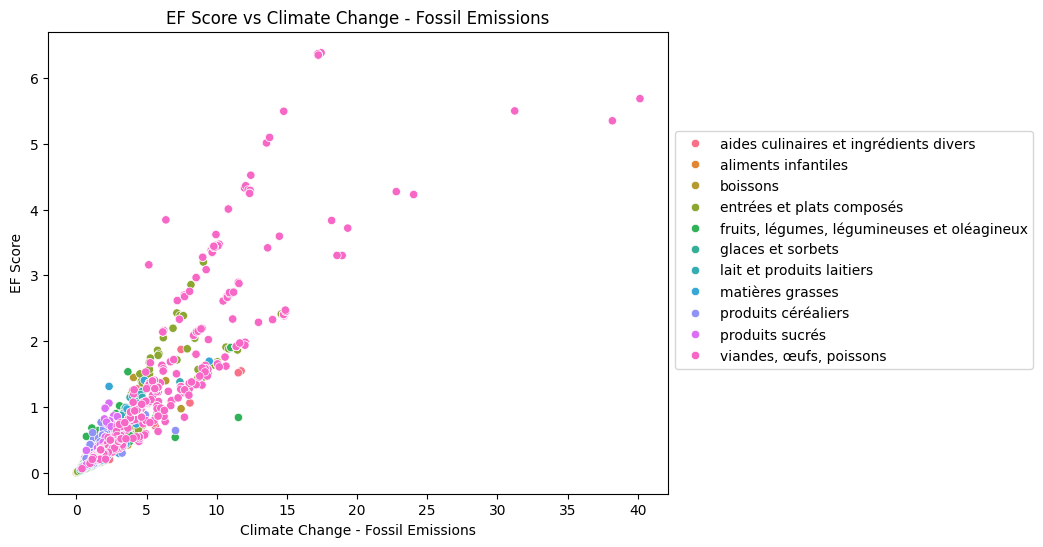

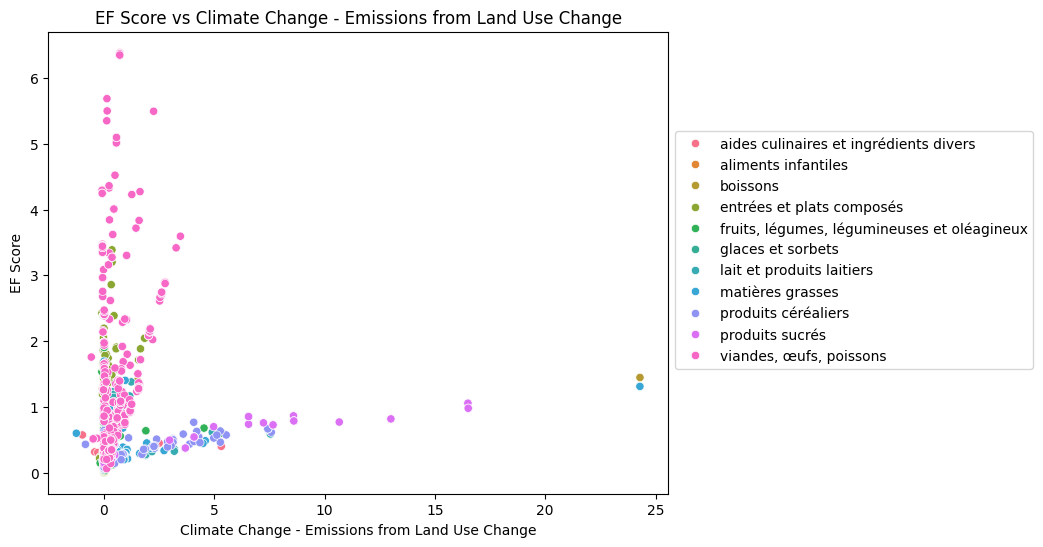

In [28]:

for col in cols :
    # Create figure and adjust size
    plt.figure(figsize=(8,6))

    # Create count plot
    ax = sns.scatterplot(df, x=col, y='EF Score', hue='Food Group', legend=True)

    # Add title
    ax.set_title(f'EF Score vs {col}')

    # Add axis labels
    ax.set_xlabel(col)
    ax.set_ylabel('EF Score')

    # Move legend outside the graph
    plt.legend(loc='upper center', bbox_to_anchor=(1.3, .8), ncol=1)
    
    # Show plot
    plt.show()
